In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics

In [17]:
avocadoes = pd.read_csv("./avocado_data/avocado.csv")
avocadoes.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
avocadoes.dropna(inplace = True) #drops rows with n/a
avocadoes.drop_duplicates(inplace = True) #drops rows with duplicates
avocadoes = avocadoes.reset_index(drop = True) #resets indexes, makes all minor titles titles again

length = len(avocadoes.index) # length of entire array
length

18249

In [25]:
avocadoes[["Small Bags","Large Bags"]]

,Small Bags,Large Bags
0,8603.62,93.25
1,9408.07,97.49
2,8042.21,103.14
3,5677.40,133.76
4,5986.26,197.69
...,...,...
18244,13066.82,431.85
18245,8940.04,324.80
18246,9351.80,42.31
18247,10919.54,50.00


In [20]:
#Imma do relationship between number of smol bags and total volume of avocadoes
x = avocadoes[["Small Bags","Large Bags"]].to_numpy()
y = avocadoes["Total Volume"].to_numpy()


In [21]:
mix = np.arange(length) #arange first generates a sequence in acending order up to that number, then makes even spaces between values in that sequence, length is list of all the numbers (their order)
np.random.shuffle(mix)

print(mix)

[  970  4567  9580 ... 14500 14093 16292]


In [22]:
split_data = int(length*0.8)
train = mix[:split_data]
test = mix[split_data:]
#learn

In [27]:
x_train, y_train = x[train], y[train] #x[train] basically takes all the values of x that have an index of train, so if train = 4216, x[4216] is in x
x_test, y_test = x[test], y[test]
x_train = x_train.reshape(-1,2) #rows, then columns
y_train = y_train.reshape(-1,2)
x_test = x_test.reshape(-1,2)
y_test = y_test.reshape(-1,2)

In [29]:
from sklearn import linear_model
linear = LinearRegression() #calls linear regression function
linear.fit(x_train, y_train)
print(linear.intercept_, linear.coef_[0])

ValueError: Found input variables with inconsistent numbers of samples: [29198, 14599]

<function matplotlib.pyplot.show(*args, **kw)>

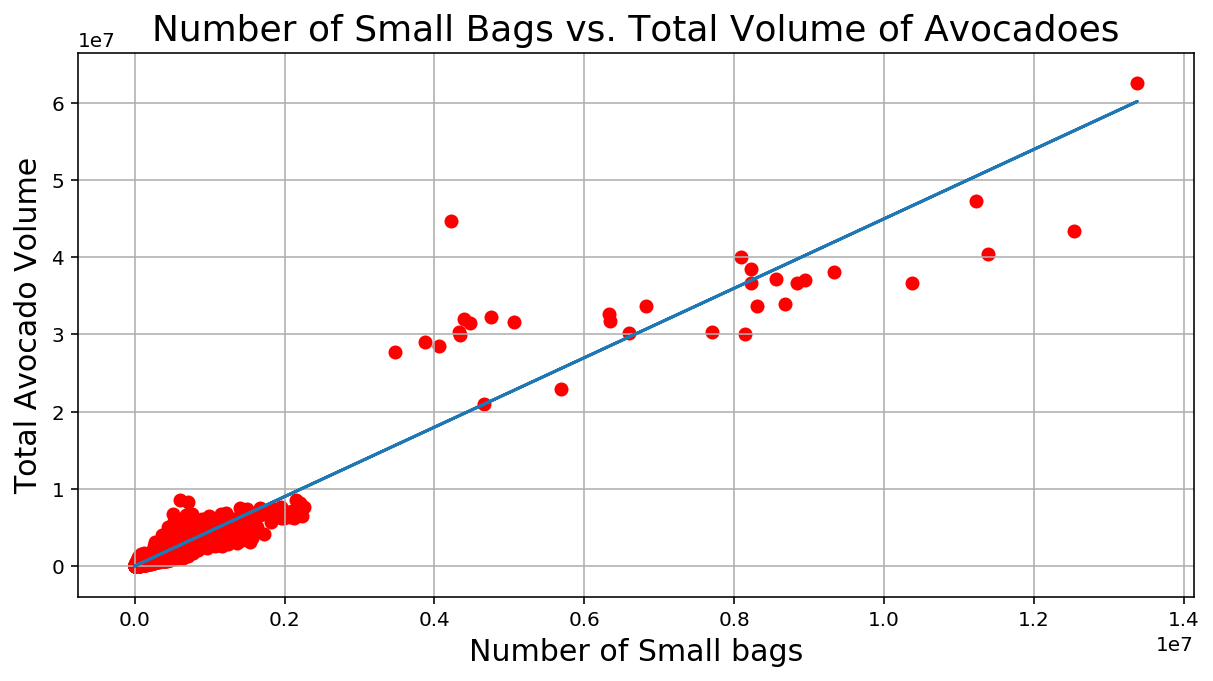

In [13]:
y_predict = linear.predict(x_test)


plt.figure(figsize = (10,5))
plt.plot(x_test, y_predict ,'-') #last parameter determines line type, - is solid, -- is dashed, -o is doted

#plt.subplot(1,1,1) #change size of plot
plt.scatter(x_test, y_test, c = "Red")
plt.title("Number of Small Bags vs. Total Volume of Avocadoes", fontsize = "18")
plt.xlabel("Number of Small bags",fontsize = "15")
plt.ylabel("Total Avocado Volume", fontsize = "15")
plt.grid("on")
plt.show